In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [10]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [11]:
#using inspector to see columns
#date and prcp are columns
measurecols = inspector.get_columns('measurement')

for x in measurecols:
    print(x)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [12]:
#only thing present is tobs
#useless
stationcols = inspector.get_columns('station')

for y in stationcols:
       print(x)

{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [13]:
#essentially just gives you the name of the station
engine.execute('SELECT * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [15]:
#trying to find the last date in the data
#last day is August 23 ,2017
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [16]:
#select the dates and prcp then put in a dataframe and plot
#passed in the the columns I wanted to select 
#when trying to set a date, returned boolean values, could filter that but there might be a better way

#this code returns boolean values for dates greater than august 23,2016
#sel = [Measurement.date > '2016-08-23',
      #Measurement.prcp]
    
sel = [Measurement.date, Measurement.prcp]

dateprcp = session.query(*sel).all()

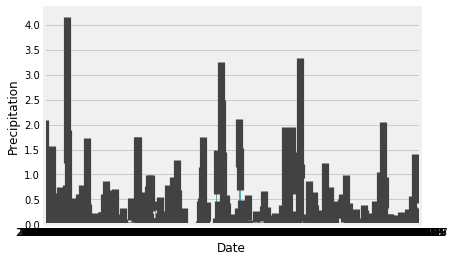

In [17]:
#refined the query
#a lot easier to query than filter the dataframe!!
date2prcp = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23')
#same thing now its a query, need to find the engine 
type(date2prcp)

date2list = [i for i in date2prcp]

date2df= pd.DataFrame(date2list, columns = ['Date', 'Precipitation'])
#convert to DF
#date2df.set_index('Date', inplace= True)

sns.barplot(date2df.Date, date2df['Precipitation'], data =date2df)

In [18]:
date2df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#use the descrive attribute

![describe](Images/describe.png)

In [21]:
stationcountdf

NameError: name 'stationcountdf' is not defined

In [22]:
# Design a query to show how many stations are available in this dataset?

station = [Measurement.station]

stationinfo = session.query(*station).all()

stationdf = pd.DataFrame(data = stationinfo, columns= ['Station'])

stationcount= stationdf['Station'].value_counts()

stationcountdf = stationcount.to_frame()

#station and counts in desc order
#could enhance by joining with the other dataframe and giving the full station name
stationcountdf.sort_values(by = 'Station',ascending = False)

,Station
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

stationweather = [Measurement.station, Measurement.tobs]

stationsweather = session.query(*stationweather).all()

statweatherdf = pd.DataFrame(stationsweather, columns= ['Station', 'Temperature'])

weathergroup = statweatherdf.groupby('Station')
#grouped by station, then found the max and min for each station, could compile into a dataframe to make it more 
#presentable

weathergroup.max()
weathergroup.min()
weathergroup.mean()


,Temperature
Station,
USC00511918,71.615968
USC00513117,72.689184
USC00514830,74.873297
USC00516128,70.915008
USC00517948,74.684402
USC00518838,72.724070
USC00519281,71.663781
USC00519397,74.553231
USC00519523,74.543649


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#station USC00519281 has the most entries
#going to try and query where station = USC00519281

#need to create another histogram just looking at the year, station is not neccessary
usc81 = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
                    filter (Measurement.station =='USC00519281', Measurement.date >= '2016-08-23')

#need to find the connection
#usc81df = pd.read_sql( usc81, session)
#have to convert it something other than query
usc81list = [x for x in usc81]

usc81df = pd.DataFrame(usc81list, columns= ['Station', 'Temperature', 'Date'])
a = usc81df['Temperature'].value_counts()
# a low of 54 and a high of 85

#has 352 rows
usc81df

,Station,Temperature,Date
0,USC00519281,77.0,2016-08-23
1,USC00519281,77.0,2016-08-24
2,USC00519281,80.0,2016-08-25
3,USC00519281,80.0,2016-08-26
4,USC00519281,75.0,2016-08-27
5,USC00519281,73.0,2016-08-28
6,USC00519281,78.0,2016-08-29
7,USC00519281,77.0,2016-08-30
8,USC00519281,78.0,2016-08-31
9,USC00519281,80.0,2016-09-01


In [25]:
bins = [53,56,59,62,65,68,71,74,77,80,83,86]

group_labels = ['53-56', '56-59', '59-62', '62-65', '65-68', '68-71', '71-74', '74-77', '77-80', '80-83', '83-86']

bintemp = pd.cut(usc81df['Temperature'], bins, labels= group_labels)

bintempdf = bintemp.to_frame()

bintempdf.head()

,Temperature
0,74-77
1,74-77
2,77-80
3,77-80
4,74-77


In [ ]:
a= bintempdf['Temperature'].value_counts()

a

(array([  0.,   0.,   6.,  13.,  27.,  53.,  58., 105.,  71.,  18.,   1.]),
 array([53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86]),
 <a list of 11 Patch objects>)

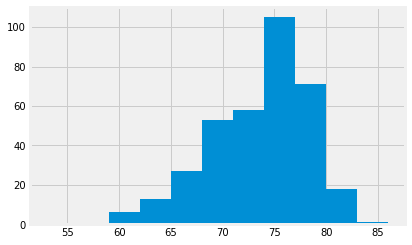

In [26]:
plt.hist(usc81df.Temperature, bins= bins)

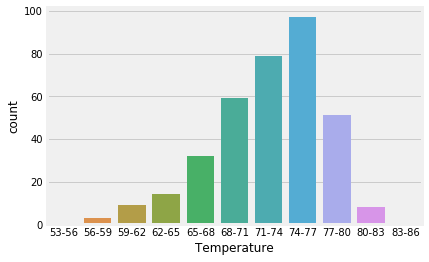

In [27]:
#didn't really like the histogram so created a bar graph
sns.countplot(x= bintempdf.Temperature,data = bintempdf,)
#can eliminate 53-56 and 83-86 because no records

In [ ]:
statweatherdf.dtypes

![precipitation](Images/station-histogram.png)

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#trip was from aug 23,2016 to aug 23,2017

triptemp = calc_temps('2016-08-23','2017-08-23')
triptemp

[(58.0, 74.59058295964125, 87.0)]

In [37]:
#returns a list of tuples
#how to navigate the tuple
mintemp = triptemp[0][0]
avgtemp = triptemp[0][1]
hightemp= triptemp[0][2]

In [38]:
error = hightemp-mintemp

NameError: name 'fig' is not defined

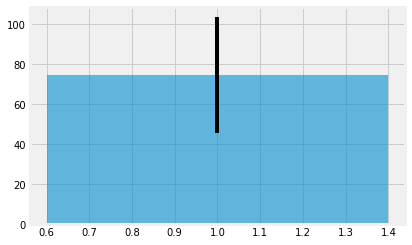

In [47]:
plt.bar(1, avgtemp ,yerr = error, alpha= 0.6, align= 'center')
fig.tight_layout

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [48]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
